In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(context='poster', style='whitegrid', font_scale=1.5)

In [3]:
fid = pd.read_csv('./fid.csv.gz').set_index(
    ['replacement', 'subset_train', 'n']).sort_index()

fid.fid.groupby(level=[0, 1]).count()

replacement  subset_train
False        False           1000
             True            1000
True         False           1000
             True            1000
Name: fid, dtype: int64

In [4]:
kid = pd.read_csv('./kid.csv.gz').set_index(
    ['replacement', 'n']).sort_index()
kid.kid.groupby(level=0).count()

replacement
False    1000
True     1000
Name: kid, dtype: int64

In [5]:
from scipy.stats.mstats import mquantiles
def plot(g, color=None, ax=None, **kwargs):
    xs = np.asarray([n for n, v in g])
    mn = g.mean()
    std = g.std()
    qs = g.apply(mquantiles, prob=[.05, .95, 1/3, 2/3])
    lo95, hi95, lo23, hi23 = np.vstack(qs).T
    
    if ax is None:
        ax = plt.gca()
    
    l = ax.errorbar(xs, mn, std, color=color, **kwargs)
    if color is None:
        color = l[0].get_color()
    ax.fill_between(xs, lo95, hi95, alpha=.4, color=color)
    ax.fill_between(xs, lo23, hi23, alpha=.5, color=color)

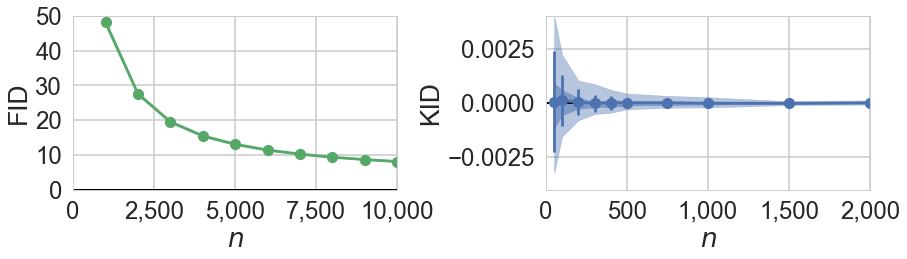

In [6]:
fig, (ax_fid, ax_kid) = plt.subplots(1, 2, figsize=(12, 3))
c1, c2 = sns.color_palette(n_colors=2)

comma_formatter = mpl.ticker.FuncFormatter(lambda x, pos: '{:,}'.format(int(x)) if x == int(x) else str(x))

plot(kid.kid.loc[True].groupby(level='n'), color=c1, marker='o', ax=ax_kid)
ax_kid.set_xlabel('$n$')
ax_kid.set_ylabel('KID')
ax_kid.axhline(0, color='k', lw=2)
ax_kid.set_xlim(0, 2000)
ax_kid.set_ylim(-.004, .004)
ax_kid.xaxis.set_major_formatter(comma_formatter)
# plt.savefig('../figs/kid-unbiased.pdf', bbox_inches='tight', pad_inches=0.1)

plot(fid.fid.loc[True , True ].groupby(level='n'), color=c2, marker='o', ax=ax_fid)
ax_fid.set_ylim(0, 50)
ax_fid.set_xlim(0, 10000)
ax_fid.set_xlabel('$n$')
ax_fid.set_ylabel('FID')
ax_fid.set_yticks([0, 10, 20, 30, 40, 50])
ax_fid.axhline(0, color='k', lw=2)
ax_fid.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:,}'.format(int(x)) if x == int(x) else str(x)))

plt.tight_layout(pad=-.5)
fig.savefig('../figs/fid-kid-bias-comparison.pdf', bbox_inches='tight', pad_inches=0.1)

In [7]:
fid.fid.loc[True, True].groupby(level='n').std().max()

0.4745928832763032

In [8]:
fid.fid.loc[True, True, 10000].mean()

8.087952482750365